# Dom Sibley
I am going to look at Dom Sibley's current test record and explore the formatting of the batting innings list page that ESPN has. 

In [1]:
# Imports
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup
import re

In [2]:
url = 'http://stats.espncricinfo.com/ci/engine/player/519082.html?class=1;template=results;type=batting;view=innings'

In [3]:
sibley_soup = BeautifulSoup(requests.get(url).text, features="html.parser")

In [4]:
for caption in sibley_soup.find_all('caption'):
    if caption.get_text() == 'Innings by innings list':
        main_table = caption.find_parent(
            'table', {'class': 'engineTable'})

In [5]:
columns = [header.get_text() for header in main_table.find('thead').find_all('tr')[0].find_all('th')]
rows = []

for innings in [
        row for row in main_table.find('tbody').find_all('tr')]:
    rows.append([stat.get_text() for stat in innings.find_all('td')])
    
sibley_innings = pd.DataFrame(rows, columns=columns).apply(pd.to_numeric, errors='ignore')

In [6]:
sibley_innings.BF.sum()

729

In [7]:
sibley_innings.BF.mean()

91.125

As we can see he has played just 8 innings opening the batting for England, and has already faced 729 balls. This is something that seems impressive, and Sibley has a reputation for facing a lot of balls in county championship cricket as well. 

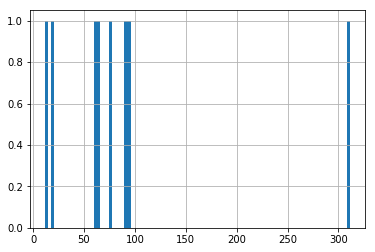

In [8]:
sibley_innings.BF.hist(bins=100)
plt.show()

It is interesting with the consistency that he appears to get past 50 balls faced, giving the other players in the team a chance to come in when the opposition bowlers already having bowled many overs; providing protection to the middle order. 

In [9]:
jennings = 'http://stats.espncricinfo.com/ci/engine/player/440780.html?class=1;template=results;type=batting;view=innings'
jennings_soup = BeautifulSoup(requests.get(jennings).text, features="html.parser")

In [10]:
for caption in jennings_soup.find_all('caption'):
    if caption.get_text() == 'Innings by innings list':
        jen_table = caption.find_parent(
            'table', {'class': 'engineTable'})

In [11]:
columns = [header.get_text() for header in jen_table.find('thead').find_all('tr')[0].find_all('th')]
rows = []

for innings in [
        row for row in jen_table.find('tbody').find_all('tr')]:
    rows.append([stat.get_text() for stat in innings.find_all('td')])
    
jenning_innings = pd.DataFrame(rows, columns=columns).apply(pd.to_numeric, errors='ignore')

In [12]:
jenning_innings.BF.sum()

1838

In [13]:
jenning_innings.BF.mean()

57.4375

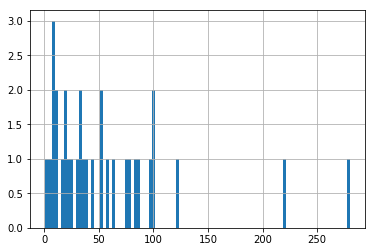

In [14]:
jenning_innings.BF.hist(bins=100)
plt.show()

Jennings on the other handle often caused pressure on the middle order by departing early in an innings. 

In [15]:
cook = 'http://stats.espncricinfo.com/ci/engine/player/11728.html?class=1;template=results;type=batting;view=innings'
cook_soup = BeautifulSoup(requests.get(cook).text, features="html.parser")

In [16]:
for caption in cook_soup.find_all('caption'):
    if caption.get_text() == 'Innings by innings list':
        cook_table = caption.find_parent(
            'table', {'class': 'engineTable'})

In [23]:
columns = [header.get_text() for header in cook_table.find('thead').find_all('tr')[0].find_all('th')]
rows = []

for innings in [row for row in cook_table.find('tbody').find_all('tr')]:
    rows.append([stat.get_text() for stat in innings.find_all('td')])
    
cook_innings = pd.DataFrame([x for x in rows if x[0] != 'DNB'], columns=columns).apply(pd.to_numeric, errors='ignore')

In [24]:
cook_innings.BF.sum()

26562

In [25]:
cook_innings.BF.mean()

91.27835051546391

Everyone knows that Cook was one of England's greatest openers, if not __the__ greatest, and his average of 91 balls per innings is very impressive, and provided England a solidity throughout his reign. 

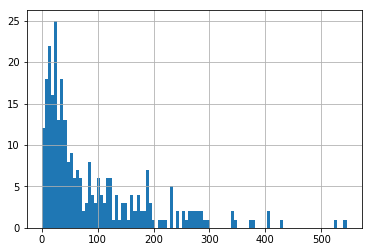

In [26]:
cook_innings.BF.hist(bins = 100)
plt.show()